In [1]:
import numpy as np

In [2]:
A = np.array([[3,2000],[2,3000],[4,5000],[5,8000],[1,2000]],dtype='float')

mean = np.mean(A,axis=0)
print("mean:",mean)
norm = A-mean
scope = np.max(norm,axis=0) - np.min(norm,axis=0)
print("scope:",scope)
norm = norm/scope
print("norm:",norm)



mean: [3.e+00 4.e+03]
scope: [4.e+00 6.e+03]
norm: [[ 0.         -0.33333333]
 [-0.25       -0.16666667]
 [ 0.25        0.16666667]
 [ 0.5         0.66666667]
 [-0.5        -0.33333333]]


In [3]:
U,S,V = np.linalg.svd(np.dot(norm.T,norm))

In [11]:
print(U.shape)

(2, 2)


In [12]:
print(U)

[[-0.67710949 -0.73588229]
 [-0.73588229  0.67710949]]


In [15]:
U_r = U[:,0].reshape(2,1)
print(U_r)

[[-0.67710949]
 [-0.73588229]]


In [16]:
R = np.dot(norm,U_r)
R

array([[ 0.2452941 ],
       [ 0.29192442],
       [-0.29192442],
       [-0.82914294],
       [ 0.58384884]])

In [17]:
z = np.dot(R,U_r.T)
z

array([[-0.16609096, -0.18050758],
       [-0.19766479, -0.21482201],
       [ 0.19766479,  0.21482201],
       [ 0.56142055,  0.6101516 ],
       [-0.39532959, -0.42964402]])

In [18]:
S = np.multiply(z,scope)+mean
S

array([[2.33563616e+00, 2.91695452e+03],
       [2.20934082e+00, 2.71106794e+03],
       [3.79065918e+00, 5.28893206e+03],
       [5.24568220e+00, 7.66090960e+03],
       [1.41868164e+00, 1.42213588e+03]])

In [20]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

def std_PCA(**argv):
    scaler = MinMaxScaler()
    pca = PCA(**argv)
    pipeline = Pipeline([('scaler',scaler),('pca',pca)])
    return pipeline

pcapl = std_PCA(n_components=1)
R2 = pcapl.fit_transform(A)
R2



array([[-0.2452941 ],
       [-0.29192442],
       [ 0.29192442],
       [ 0.82914294],
       [-0.58384884]])

In [21]:
pcapl.inverse_transform(R2)

array([[2.33563616e+00, 2.91695452e+03],
       [2.20934082e+00, 2.71106794e+03],
       [3.79065918e+00, 5.28893206e+03],
       [5.24568220e+00, 7.66090960e+03],
       [1.41868164e+00, 1.42213588e+03]])

In [26]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
X, y = datasets.load_iris(return_X_y=True)
print(y)
print(X.shape,y.shape)
y_pred=OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)
print(y-y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 4) (150,)
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


/Users/zhanggan/anaconda3/envs/mlenv2/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/zhanggan/anaconda3/envs/mlenv2/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
Y = np.array([[0,1],[0,1],[1,0],[0,1],[1,0]])
y_a=np.where(Y[:,0],Y[:,0],Y[:,0])
y_a


array([0, 0, 1, 0, 1])

In [41]:
x=np.linspace(-50,50)
type(x)

numpy.ndarray

In [42]:
import matplotlib.pyplot as plt

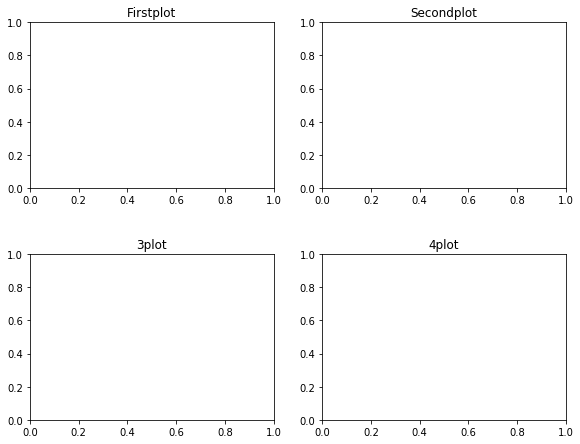

In [60]:
plt.figure(figsize=(8, 6))
plt.subplot(2,2,1)
plt.title("Firstplot")
plt.subplot(2,2,2)
plt.title("Secondplot")
plt.subplot(2,2,3)
plt.title("3plot")
plt.subplot(2,2,4)
plt.title("4plot")
plt.subplots_adjust(.04, .02, .97, .94, .2, .4)
plt.show()

([<matplotlib.axis.XTick at 0x1a23a0fc50>,
 <a list of 5 Text xticklabel objects>)

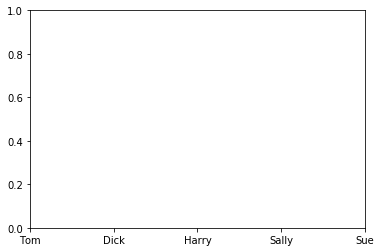

In [50]:
# return locs, labels where locs is an array of tick locations and
# labels is an array of tick labels.
locs, labels = plt.xticks()
#print(locs,labels)
# set the locations of the xticks
#plt.xticks( np.arange(6) )

# # set the locations and labels of the xticks
plt.xticks( np.arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )

In [61]:
symbol_dict = {
    'TOT': 'Total',
    'XOM': 'Exxon',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'VLO': 'Valero Energy',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'TWX': 'Time Warner',
    'CMCSA': 'Comcast',
    'CVC': 'Cablevision',
    'YHOO': 'Yahoo',
    'DELL': 'Dell',
    'HPQ': 'HP',
    'AMZN': 'Amazon',
    'TM': 'Toyota',
    'CAJ': 'Canon',
    'SNE': 'Sony',
    'F': 'Ford',
    'HMC': 'Honda',
    'NAV': 'Navistar',
    'NOC': 'Northrop Grumman',
    'BA': 'Boeing',
    'KO': 'Coca Cola',
    'MMM': '3M',
    'MCD': 'McDonald\'s',
    'PEP': 'Pepsi',
    'K': 'Kellogg',
    'UN': 'Unilever',
    'MAR': 'Marriott',
    'PG': 'Procter Gamble',
    'CL': 'Colgate-Palmolive',
    'GE': 'General Electrics',
    'WFC': 'Wells Fargo',
    'JPM': 'JPMorgan Chase',
    'AIG': 'AIG',
    'AXP': 'American express',
    'BAC': 'Bank of America',
    'GS': 'Goldman Sachs',
    'AAPL': 'Apple',
    'SAP': 'SAP',
    'CSCO': 'Cisco',
    'TXN': 'Texas Instruments',
    'XRX': 'Xerox',
    'WMT': 'Wal-Mart',
    'HD': 'Home Depot',
    'GSK': 'GlaxoSmithKline',
    'PFE': 'Pfizer',
    'SNY': 'Sanofi-Aventis',
    'NVS': 'Novartis',
    'KMB': 'Kimberly-Clark',
    'R': 'Ryder',
    'GD': 'General Dynamics',
    'RTN': 'Raytheon',
    'CVS': 'CVS',
    'CAT': 'Caterpillar',
    'DD': 'DuPont de Nemours'}

In [82]:
s={'b':'xx','a':'yy','c':'zz'}
z=sorted(s.items())
print(z)
t=np.array(z)
print(t)
tt=t.T
print(tt)

[('a', 'yy'), ('b', 'xx'), ('c', 'zz')]
[['a' 'yy']
 ['b' 'xx']
 ['c' 'zz']]
[['a' 'b' 'c']
 ['yy' 'xx' 'zz']]


In [86]:
two=np.array(sorted(symbol_dict.items())).T
print(two.shape)

(2, 56)


In [102]:
two = np.array([[2,1],[3,2],[4,5]]).T

In [103]:
s,t=two

In [104]:
print(s,t)

[2 3 4] [1 2 5]


In [109]:
url = ('https://raw.githubusercontent.com/scikit-learn/examples-data/'
           'master/financial-data/{}.csv')
print(url)
type(url)
ss=('xx' 'yy')
print(ss)

https://raw.githubusercontent.com/scikit-learn/examples-data/master/financial-data/{}.csv
xxyy


In [110]:
st='hello{}'
tt=st.format('LiSir')
print(tt)

helloLiSir


In [115]:
url = ('https://raw.githubusercontent.com/scikit-learn/examples-data/'
           'master/financial-data/{}.csv')
import pandas as pd 
u=pd.read_csv(url.format('IBM'))
print(type(u))
p=[]
p.append(u)
print(p)

URLError: <urlopen error [Errno 61] Connection refused>